***Regressão Linear***

Treinar o modelo usando o knn:
    - fazer a regressão linear 
    - árvores de decisão 
    - Random Forest e variantes (e.g., XGBoost)
    - Support Vector Machines (SVM)
    - Redes Neuronais

features (x) - colunas de 0 a 11 
target (price, y) - coluna 12 

In [27]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from category_encoders import TargetEncoder 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as mtick
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb



In [3]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
### ----------------TRAIN------------------------------------------------------
train['horsepower'] = train['engine'].str.extract('(\d+\.?\d*)HP').astype(float)
train['displacement'] = train['engine'].str.extract(r'(\d+\.?\d*)L').astype(float)
train['cylinders'] = train['engine'].str.extract(r'(\d+)\s*Cylinder').astype(float)

no_engine = (train['horsepower'].isnull() & train['horsepower'].isnull() & train['horsepower'].isnull())
train['eletric'] = np.where(no_engine, 1,0)
train.drop(columns= ['engine'], inplace=True)

### ----------------TESTE------------------------------------------------------
test['horsepower'] = test['engine'].str.extract('(\d+\.?\d*)HP').astype(float)
test['displacement'] = test['engine'].str.extract(r'(\d+\.?\d*)L').astype(float)
test['cylinders'] = test['engine'].str.extract(r'(\d+)\s*Cylinder').astype(float)
test['fuel_type'] = test['fuel_type'].replace('not supported', 'unknown')

no_engine = (test['horsepower'].isnull() & test['displacement'].isnull() & test['cylinders'].isnull())
test['eletric'] = np.where(no_engine, 1, 0)
test.drop(columns=['engine'], inplace=True)

train

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\admin\AppData\Local\Temp\ipykernel_20744\1104793396.py:2: SyntaxWarning: invalid escape sequence '\d'
  train['horsepower'] = train['engine'].str.extract('(\d+\.?\d*)HP').astype(float)
C:\Users\admin\AppData\Local\Temp\ipykernel_20744\1104793396.py:11: SyntaxWarning: invalid escape sequence '\d'
  test['horsepower'] = test['engine'].str.extract('(\d+\.?\d*)HP').astype(float)


,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,horsepower,displacement,cylinders,eletric
0,0,MINI,Cooper S Base,2007,213000,Gasoline,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4.0,0
1,1,Lincoln,LS V8,2002,143250,Gasoline,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0,0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,8.0,0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,8.0,0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500,420.0,6.2,8.0,0
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000,385.0,3.0,6.0,0
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,7-Speed A/T,White,Black,None reported,Yes,86900,469.0,4.0,8.0,0
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900,NaN,3.0,NaN,1


In [5]:
### ----------------TRAIN------------------------------------------------------

train = train.fillna({'fuel_type': 'unknown', 'clean_title': 0, 'accident': 'unknown', 'horsepower': 0, 'displacement': 0, 'cylinders': 0})
replace_cols = ['fuel_type', 'ext_col', 'int_col']

for col in replace_cols:
    train[col] = train[col].replace({'–': 'unknown'})
    
### ----------------TEST------------------------------------------------------

test = test.fillna({'fuel_type': 'unknown', 'clean_title': 0, 'accident': 'unknown', 'horsepower': 0, 'displacement': 0, 'cylinders': 0})
    
for col in ['fuel_type', 'ext_col', 'int_col']:
    test[col] = test[col].replace({'–': 'unknown'})

test

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,horsepower,displacement,cylinders,eletric
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,6-Speed A/T,White,Beige,None reported,Yes,240.0,2.0,4.0,0
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,8-Speed A/T,Silver,Black,None reported,Yes,395.0,3.0,6.0,0
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,10-Speed Automatic,White,Ebony,None reported,0,0.0,3.5,0.0,0
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,Automatic,Silician Yellow,Black,None reported,0,0.0,0.0,0.0,1
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,A/T,Gray,Black,None reported,Yes,252.0,2.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,7-Speed A/T,Black,Black,None reported,Yes,362.0,3.0,6.0,0
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,Automatic,White,Black,None reported,0,0.0,0.0,0.0,1
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,A/T,Black,Black,None reported,Yes,333.0,3.0,6.0,0
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,A/T,Black,Black,None reported,Yes,333.0,3.0,6.0,0


In [6]:
accident = {
    'None reported': 0,
    'At least 1 accident or damage reported' : 1,
    'unknown' : 0
}

### ----------------TRAIN------------------------------------------------------
train['clean_title'] = train['clean_title'].astype('category')
train['clean_title'] = train['clean_title'].cat.codes

train['accident'] = train['accident'].map(accident)

### ----------------TEST------------------------------------------------------

test['clean_title'] = test['clean_title'].astype('category')
test['clean_title'] = test['clean_title'].cat.codes

test['accident'] = test['accident'].map(accident)

train
test



,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,horsepower,displacement,cylinders,eletric
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,6-Speed A/T,White,Beige,0,1,240.0,2.0,4.0,0
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,8-Speed A/T,Silver,Black,0,1,395.0,3.0,6.0,0
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,10-Speed Automatic,White,Ebony,0,0,0.0,3.5,0.0,0
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,Automatic,Silician Yellow,Black,0,0,0.0,0.0,0.0,1
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,A/T,Gray,Black,0,1,252.0,2.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Gasoline,7-Speed A/T,Black,Black,0,1,362.0,3.0,6.0,0
125686,314219,Audi,Q7 55 Prestige,2019,29336,Gasoline,Automatic,White,Black,0,0,0.0,0.0,0.0,1
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Gasoline,A/T,Black,Black,0,1,333.0,3.0,6.0,0
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Gasoline,A/T,Black,Black,0,1,333.0,3.0,6.0,0


In [7]:
ohe_fuel = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

### ----------------TRAIN------------------------------------------------------
train['fuel_type'] = train['fuel_type'].astype('category')
fuel_ohe_train = ohe_fuel.fit_transform(train[['fuel_type']])
fuel_ohe_train_df = pd.DataFrame(fuel_ohe_train, 
                                 columns=ohe_fuel.get_feature_names_out(['fuel_type']),
                                 index=train.index)

train = pd.concat([train.drop(columns=['fuel_type']), fuel_ohe_train_df], axis=1)

### ----------------TEST------------------------------------------------------
test['fuel_type'] = test['fuel_type'].astype('category')
fuel_ohe_test = ohe_fuel.transform(test[['fuel_type']])
fuel_ohe_test_df = pd.DataFrame(fuel_ohe_test, 
                                columns=ohe_fuel.get_feature_names_out(['fuel_type']),
                                index=test.index)

test = pd.concat([test.drop(columns=['fuel_type']), fuel_ohe_test_df], axis=1)

train
test

,id,brand,model,model_year,milage,transmission,ext_col,int_col,accident,clean_title,...,displacement,cylinders,eletric,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_unknown
0,188533,Land,Rover LR2 Base,2015,98000,6-Speed A/T,White,Beige,0,1,...,2.0,4.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,188534,Land,Rover Defender SE,2020,9142,8-Speed A/T,Silver,Black,0,1,...,3.0,6.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,188535,Ford,Expedition Limited,2022,28121,10-Speed Automatic,White,Ebony,0,0,...,3.5,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,188536,Audi,A6 2.0T Sport,2016,61258,Automatic,Silician Yellow,Black,0,0,...,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,A/T,Gray,Black,0,1,...,2.0,4.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,7-Speed A/T,Black,Black,0,1,...,3.0,6.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
125686,314219,Audi,Q7 55 Prestige,2019,29336,Automatic,White,Black,0,0,...,0.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,A/T,Black,Black,0,1,...,3.0,6.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
125688,314221,Audi,Q7 3.0T Premium,2012,112000,A/T,Black,Black,0,1,...,3.0,6.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:

train['transmission_type'] = train['transmission'].str.extract(
    r'(A/T|M/T|CVT|Auto-Shift|Dual Shift|Overdrive Switch|Automatic|Manual)'
)
train['transmission_speed'] = train['transmission'].str.extract('(\d+\.?\d*)-Speed').astype(float)
train = train.fillna({'transmission_speed': 0, 'transmission_type': 'unknown'})

train = train.drop('transmission', axis = 1)
 
# Extrair tipo de transmissão
test['transmission_type'] = test['transmission'].str.extract(
    r'(A/T|M/T|CVT|Auto-Shift|Dual Shift|Overdrive Switch|Automatic|Manual)'
)

# Extrair velocidade (pode não existir → vira NaN e depois tratamos)
test['transmission_speed'] = test['transmission'].str.extract('(\d+\.?\d*)-Speed')

# Converter transmission_speed para float (com errors='coerce' para evitar crash)
test['transmission_speed'] = pd.to_numeric(test['transmission_speed'], errors='coerce')

# Preencher valores em falta da mesma forma que no train
test = test.fillna({
    'transmission_speed': 0,
    'transmission_type': 'unknown'
})

# Remover coluna original (igual ao train)
test = test.drop(columns=['transmission'])

train
test


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:15: SyntaxWarning: invalid escape sequence '\d'
C:\Users\admin\AppData\Local\Temp\ipykernel_20744\3418142822.py:4: SyntaxWarning: invalid escape sequence '\d'
  train['transmission_speed'] = train['transmission'].str.extract('(\d+\.?\d*)-Speed').astype(float)
C:\Users\admin\AppData\Local\Temp\ipykernel_20744\3418142822.py:15: SyntaxWarning: invalid escape sequence '\d'
  test['transmission_speed'] = test['transmission'].str.extract('(\d+\.?\d*)-Speed')


,id,brand,model,model_year,milage,ext_col,int_col,accident,clean_title,horsepower,...,eletric,fuel_type_Diesel,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_unknown,transmission_type,transmission_speed
0,188533,Land,Rover LR2 Base,2015,98000,White,Beige,0,1,240.0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,A/T,6.0
1,188534,Land,Rover Defender SE,2020,9142,Silver,Black,0,1,395.0,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,A/T,8.0
2,188535,Ford,Expedition Limited,2022,28121,White,Ebony,0,0,0.0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Automatic,10.0
3,188536,Audi,A6 2.0T Sport,2016,61258,Silician Yellow,Black,0,0,0.0,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Automatic,0.0
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gray,Black,0,1,252.0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,A/T,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Black,Black,0,1,362.0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,A/T,7.0
125686,314219,Audi,Q7 55 Prestige,2019,29336,White,Black,0,0,0.0,...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Automatic,0.0
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Black,Black,0,1,333.0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,A/T,0.0
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Black,Black,0,1,333.0,...,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,A/T,0.0


In [9]:
train['transmission_type'] = train['transmission_type'].astype('category')
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output= False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(train[['transmission_type']]).astype(int)
train = pd.concat([train, ohetransform], axis=1).drop(columns=['transmission_type'])

# Garantir que a coluna é category
test['transmission_type'] = test['transmission_type'].astype('category')

# Usar o encoder treinado no train (ohe)
ohe_test = ohe.transform(test[['transmission_type']]).astype(int)

# Criar DataFrame com as colunas corretas
ohe_test_df = pd.DataFrame(
    ohe_test,
    columns=ohe.get_feature_names_out(['transmission_type']),
    index=test.index
)

# Concatenar e remover a coluna original
test = pd.concat([test.drop(columns=['transmission_type']), ohe_test_df], axis=1)
test

,id,brand,model,model_year,milage,ext_col,int_col,accident,clean_title,horsepower,...,fuel_type_unknown,transmission_speed,transmission_type_A/T,transmission_type_Automatic,transmission_type_CVT,transmission_type_Dual Shift,transmission_type_M/T,transmission_type_Manual,transmission_type_Overdrive Switch,transmission_type_unknown
0,188533,Land,Rover LR2 Base,2015,98000,White,Beige,0,1,240.0,...,0.0,6.0,1,0,0,0,0,0,0,0
1,188534,Land,Rover Defender SE,2020,9142,Silver,Black,0,1,395.0,...,0.0,8.0,1,0,0,0,0,0,0,0
2,188535,Ford,Expedition Limited,2022,28121,White,Ebony,0,0,0.0,...,0.0,10.0,0,1,0,0,0,0,0,0
3,188536,Audi,A6 2.0T Sport,2016,61258,Silician Yellow,Black,0,0,0.0,...,0.0,0.0,0,1,0,0,0,0,0,0
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gray,Black,0,1,252.0,...,0.0,0.0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Black,Black,0,1,362.0,...,0.0,7.0,1,0,0,0,0,0,0,0
125686,314219,Audi,Q7 55 Prestige,2019,29336,White,Black,0,0,0.0,...,0.0,0.0,0,1,0,0,0,0,0,0
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Black,Black,0,1,333.0,...,0.0,0.0,1,0,0,0,0,0,0,0
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Black,Black,0,1,333.0,...,0.0,0.0,1,0,0,0,0,0,0,0


In [10]:
import re
ext_colors = train['ext_col'].astype(str)
int_colors = train['int_col'].astype(str)
ext_colors_test = test['ext_col'].astype(str)
int_colors_test = test['int_col'].astype(str)

one_ext_color = ext_colors[ext_colors.str.contains(r'^[A-Za-zÀ-ÿ]+$', regex=True)].unique().tolist()
one_int_color = int_colors[int_colors.str.contains(r'^[A-Za-zÀ-ÿ]+$', regex=True)].unique().tolist()

colors_map = {c.lower(): c for c in one_ext_color}
def normalize_color(color):
    lower_color = color.lower()
    for word, base_color in colors_map.items():
        if re.search(rf'\b{word}\b', lower_color):
            return base_color
    return color

In [11]:
train['ext_col']= ext_colors.apply(normalize_color)
train['int_col'] = int_colors.apply(normalize_color)

test['ext_col'] = ext_colors_test.apply(normalize_color)
test['int_col'] = int_colors_test.apply(normalize_color)

train['all_colors'] = train[['int_col', 'ext_col']].values.tolist()
test['all_colors'] = test[['int_col', 'ext_col']].values.tolist()


exploded_train = train['all_colors'].explode()
exploded_test = test['all_colors'].explode()


count_df_train = pd.crosstab(exploded_train.index, exploded_train)

count_df_test = pd.crosstab(exploded_test.index, exploded_test)

count_df_train_columns = [c for c in count_df_train.columns]

count_df_test.columns = [c for c in count_df_test.columns]


train = pd.concat([train, count_df_train], axis=1).drop(columns=['int_col', 'ext_col', 'all_colors'])
test = pd.concat([test.drop(columns=['int_col','ext_col','all_colors']), count_df_test], axis=1)
test


,id,brand,model,model_year,milage,accident,clean_title,horsepower,displacement,cylinders,...,Tension,Tupelo,Verde,Very Light Cashmere,Walnut,White,Wind Chill Pearl,Yellow,Yulong,unknown
0,188533,Land,Rover LR2 Base,2015,98000,0,1,240.0,2.0,4.0,...,0,0,0,0,0,1,0,0,0,0
1,188534,Land,Rover Defender SE,2020,9142,0,1,395.0,3.0,6.0,...,0,0,0,0,0,0,0,0,0,0
2,188535,Ford,Expedition Limited,2022,28121,0,0,0.0,3.5,0.0,...,0,0,0,0,0,1,0,0,0,0
3,188536,Audi,A6 2.0T Sport,2016,61258,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,0,1,252.0,2.0,4.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,0,1,362.0,3.0,6.0,...,0,0,0,0,0,0,0,0,0,0
125686,314219,Audi,Q7 55 Prestige,2019,29336,0,0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,0,1,333.0,3.0,6.0,...,0,0,0,0,0,0,0,0,0,0
125688,314221,Audi,Q7 3.0T Premium,2012,112000,0,1,333.0,3.0,6.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train['brand'] = train['brand'].astype('category')

# criar e treinar o encoder
ohe_brand = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
brand_train = ohe_brand.fit_transform(train[['brand']]).astype(int)

# concatenar com o train e remover a coluna original
train = pd.concat([train.drop(columns=['brand']), brand_train], axis=1)


# usar o encoder treinado no train
brand_test = ohe_brand.transform(test[['brand']]).astype(int)

# criar DataFrame com colunas corretas
brand_test_df = pd.DataFrame(
    brand_test,
    columns=ohe_brand.get_feature_names_out(['brand']),
    index=test.index
)

# concatenar e remover a coluna original
test = pd.concat([test.drop(columns=['brand']), brand_test_df], axis=1)

test


,id,model,model_year,milage,accident,clean_title,horsepower,displacement,cylinders,eletric,...,brand_Saab,brand_Saturn,brand_Scion,brand_Subaru,brand_Suzuki,brand_Tesla,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_smart
0,188533,Rover LR2 Base,2015,98000,0,1,240.0,2.0,4.0,0,...,0,0,0,0,0,0,0,0,0,0
1,188534,Rover Defender SE,2020,9142,0,1,395.0,3.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0
2,188535,Expedition Limited,2022,28121,0,0,0.0,3.5,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,188536,A6 2.0T Sport,2016,61258,0,0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,188537,A6 2.0T Premium Plus,2018,59000,0,1,252.0,2.0,4.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,GL-Class GL 450 4MATIC,2014,83315,0,1,362.0,3.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0
125686,314219,Q7 55 Prestige,2019,29336,0,0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
125687,314220,A6 3.0T Premium Plus,2012,77634,0,1,333.0,3.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0
125688,314221,Q7 3.0T Premium,2012,112000,0,1,333.0,3.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# drops em colunas que não serão necessárias para as previsões 

drop_cols = ['transmission_type_unknown', 'fuel_type_unknown', 'fuel_type_not supported', 'unknown']

train = train.drop(columns=drop_cols, axis=1)
test = test.drop(columns=drop_cols, axis=1)
train
test

,id,model,model_year,milage,accident,clean_title,horsepower,displacement,cylinders,eletric,...,brand_Saab,brand_Saturn,brand_Scion,brand_Subaru,brand_Suzuki,brand_Tesla,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_smart
0,188533,Rover LR2 Base,2015,98000,0,1,240.0,2.0,4.0,0,...,0,0,0,0,0,0,0,0,0,0
1,188534,Rover Defender SE,2020,9142,0,1,395.0,3.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0
2,188535,Expedition Limited,2022,28121,0,0,0.0,3.5,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,188536,A6 2.0T Sport,2016,61258,0,0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,188537,A6 2.0T Premium Plus,2018,59000,0,1,252.0,2.0,4.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,GL-Class GL 450 4MATIC,2014,83315,0,1,362.0,3.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0
125686,314219,Q7 55 Prestige,2019,29336,0,0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
125687,314220,A6 3.0T Premium Plus,2012,77634,0,1,333.0,3.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0
125688,314221,Q7 3.0T Premium,2012,112000,0,1,333.0,3.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Tratar da coluna model - mediana

train_model = train.groupby('model')['price'].median()
train['model'] = train['model'].map(train_model)

test['model'] = test['model'].map(train_model)

test = test.fillna({'model' : 0})
test

,id,model,model_year,milage,accident,clean_title,horsepower,displacement,cylinders,eletric,...,brand_Saab,brand_Saturn,brand_Scion,brand_Subaru,brand_Suzuki,brand_Tesla,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_smart
0,188533,13125.0,2015,98000,0,1,240.0,2.0,4.0,0,...,0,0,0,0,0,0,0,0,0,0
1,188534,67000.0,2020,9142,0,1,395.0,3.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0
2,188535,44737.5,2022,28121,0,0,0.0,3.5,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,188536,27225.0,2016,61258,0,0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
4,188537,24000.0,2018,59000,0,1,252.0,2.0,4.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,24220.0,2014,83315,0,1,362.0,3.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0
125686,314219,39900.0,2019,29336,0,0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
125687,314220,23999.5,2012,77634,0,1,333.0,3.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0
125688,314221,29950.0,2012,112000,0,1,333.0,3.0,6.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = train.drop(columns=['price', 'id'])
Y_train = train['price']

X_test = test.drop(columns= 'id')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [138]:
X_train

,model,model_year,milage,accident,clean_title,horsepower,displacement,cylinders,eletric,fuel_type_Diesel,...,brand_Saab,brand_Saturn,brand_Scion,brand_Subaru,brand_Suzuki,brand_Tesla,brand_Toyota,brand_Volkswagen,brand_Volvo,brand_smart
0,10700.0,2007,213000,0,1,172.0,1.6,4.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,10299.0,2002,143250,1,1,252.0,3.9,8.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,21497.5,2002,136731,0,1,320.0,5.3,8.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,40655.0,2017,19500,0,1,420.0,5.0,8.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,43900.0,2021,7388,0,1,208.0,2.0,4.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,37949.5,2017,49000,0,1,420.0,6.2,8.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
188529,47499.0,2018,28600,1,1,385.0,3.0,6.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
188530,53700.0,2021,13650,0,1,469.0,4.0,8.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
188531,32000.0,2022,13895,0,0,0.0,3.0,0.0,1,0.0,...,0,0,0,0,0,0,0,0,0,0


**Linear Regression**

ValueError: x and y must be the same size

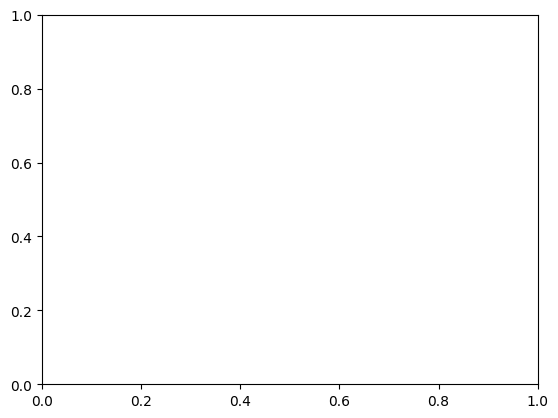

In [ ]:

model = LinearRegression()
model.fit(X_train_scaled, Y_train)

Y_pred_train = model.predict(X_test_scaled)

plt.scatter(Y_train, Y_pred_train, marker= 'x')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

lims = [min(Y_train.min(), Y_pred_train.min()), max(Y_train.max(), Y_pred_train.max())]
plt.plot(lims, lims, color = 'red', linewidth=2, label='Perfect Prediction')

plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.title('Actual Price vs Predicted Price')
plt.legend()
plt.show()

**K-Nearest Neighbors (KNN)**

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, Y_train)

Y_pred = knn.predict(X_test_scaled)

print(Y_pred[:100])

[ 15659.8 136100.   46382.6  26736.   27439.6  13839.8  19519.8  29952.6
  67898.8  21730.   28640.    7210.   31610.  104578.8  15820.   79771.
  17379.8   8670.   49094.   45263.6  65678.   21919.8  53149.   15380.
  15598.8  50978.   26879.4  12820.   74060.8  19948.   61357.   31560.
  85290.   33100.   15939.6  33151.8  66865.2  14060.   40000.   70050.
  18500.   25579.   56398.8  31790.    8760.    7017.4  46197.8  44378.4
  85298.8  36390.   92099.8  32740.   38096.   30245.2  40768.6  26098.8
  16149.8  15559.   23799.   33797.8  34151.4  83078.   25379.   55707.8
  30999.8  22998.8  15480.   69145.4  57243.6  34199.8 103358.    9809.8
  41620.   27598.8  91518.   17399.8  48419.8  57620.   23360.   73849.
  20880.   17810.   17499.6  87979.8  45200.   26359.8 122824.6  10280.
  26969.   66289.8  64204.4  43752.   32799.6  11398.   83244.8  47010.
  24739.8  32451.   51268.8  52398.4]


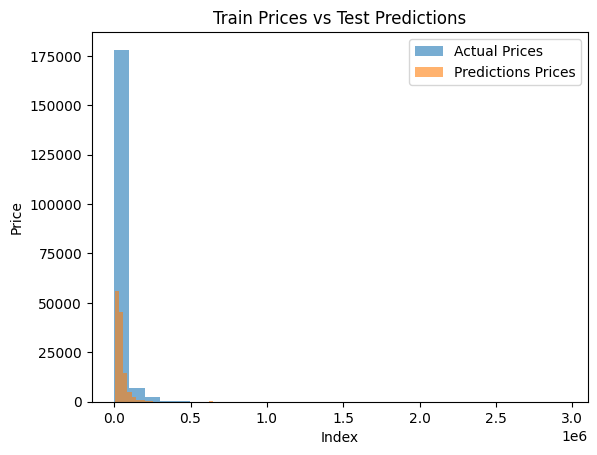

In [35]:
plt.hist(Y_train, bins=30, alpha=0.6, label='Actual Prices')
plt.hist(Y_pred, bins=30, alpha=0.6, label='Predictions Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Train Prices vs Test Predictions')
plt.legend()
plt.show()


**Random Forest e variantes**

In [36]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, Y_train)

Y_pred_rf = rf.predict(X_test_scaled)

KeyboardInterrupt: 

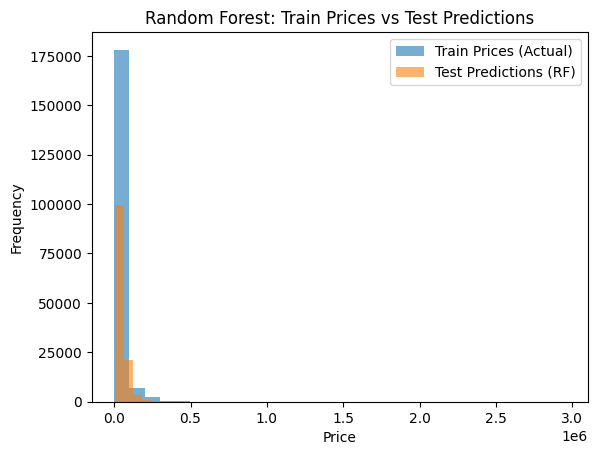

In [37]:
plt.hist(Y_train, bins=30, alpha=0.6, label='Train Prices (Actual)')
plt.hist(Y_pred_rf, bins=30, alpha=0.6, label='Test Predictions (RF)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Random Forest: Train Prices vs Test Predictions')
plt.legend()
plt.show()

**XGBoost Regressor**

In [28]:
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

xgb_model.fit(X_train_scaled, Y_train)

# Prever
Y_pred_xgb = xgb_model.predict(X_test_scaled)

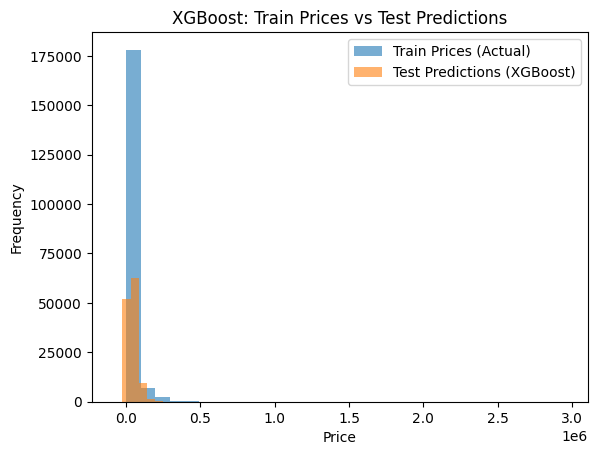

In [38]:
plt.hist(Y_train, bins=30, alpha=0.6, label='Train Prices (Actual)')
plt.hist(Y_pred_xgb, bins=30, alpha=0.6, label='Test Predictions (XGBoost)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('XGBoost: Train Prices vs Test Predictions')
plt.legend()
plt.show()